## Importing libraries and directories

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

## Emotions

In [2]:
root_dir = 'D:/Real_Time_Sentiment_Analysis/data'
train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

In [3]:
labels = os.listdir(train_dir)
labels

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [4]:
#counting the images in each dataset
file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Total image count: 35887
Total training images: 28709
Total testing images: 7178


## Plotting

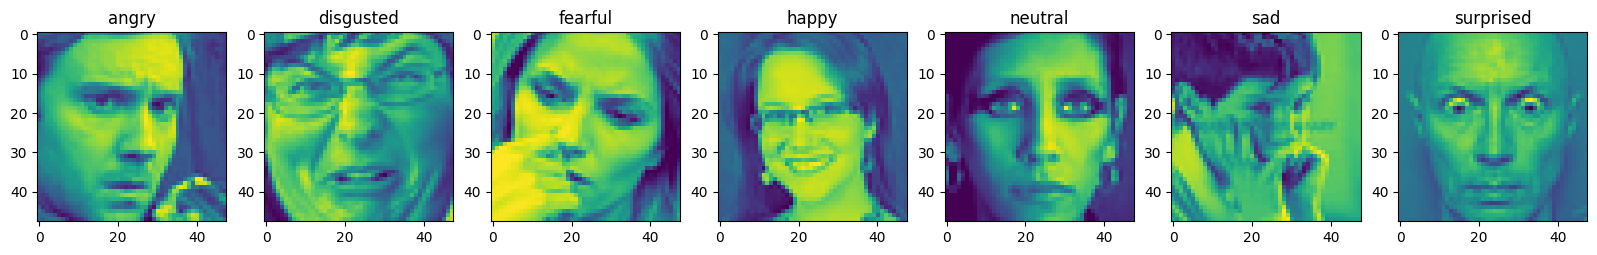

In [5]:
fig, axes = plt.subplots(1, 7, figsize=(20,8))

for i in range(len(labels)):
    d = train_dir+labels[i]+'/'+os.listdir(train_dir+labels[i]+'/')[0]
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(labels[i])
plt.show()

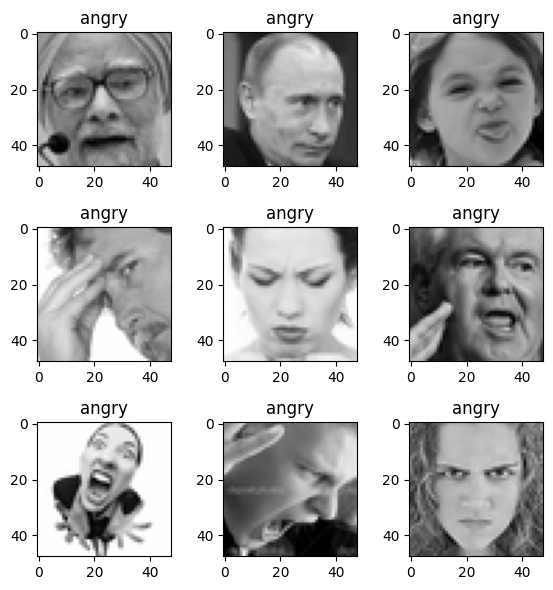

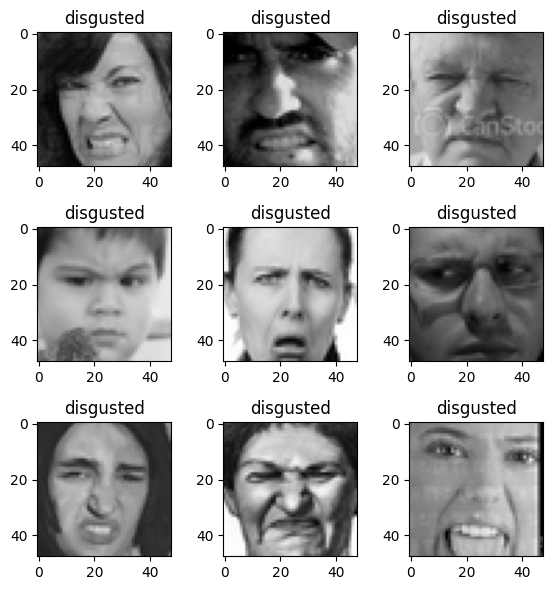

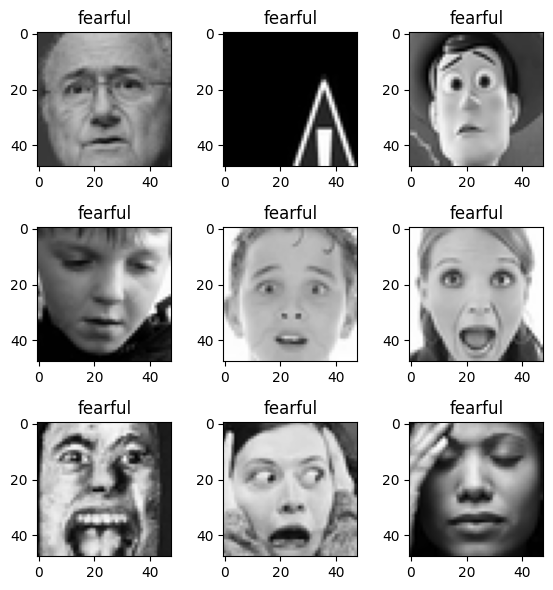

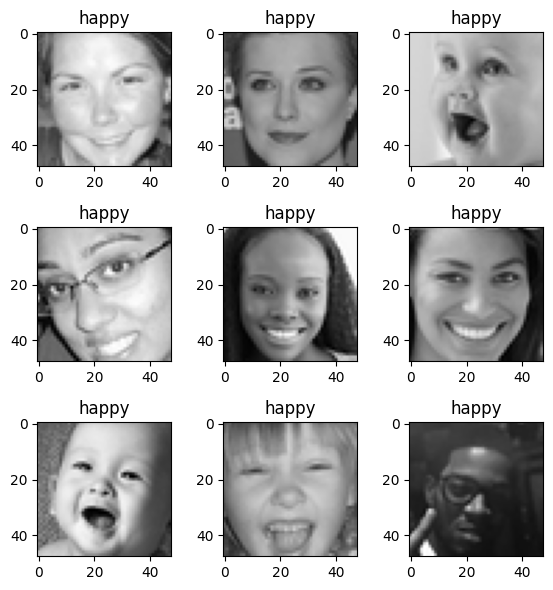

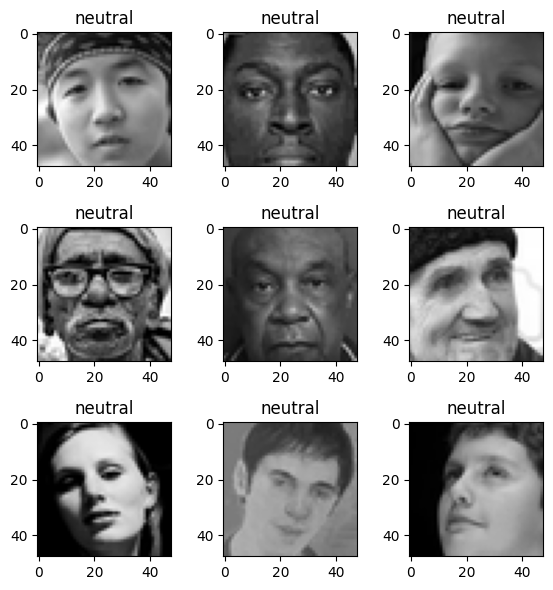

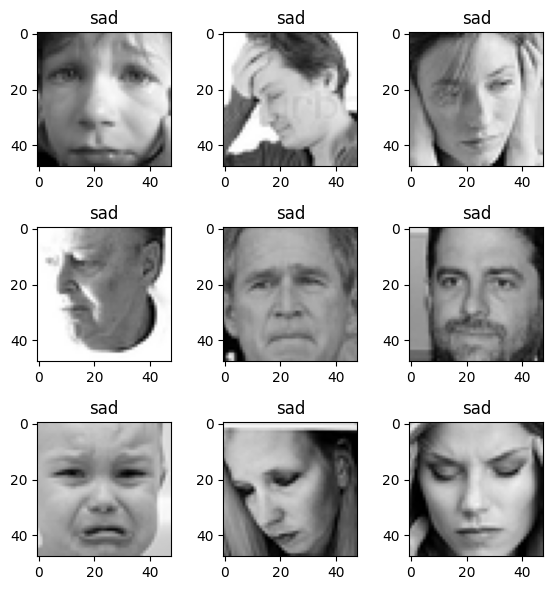

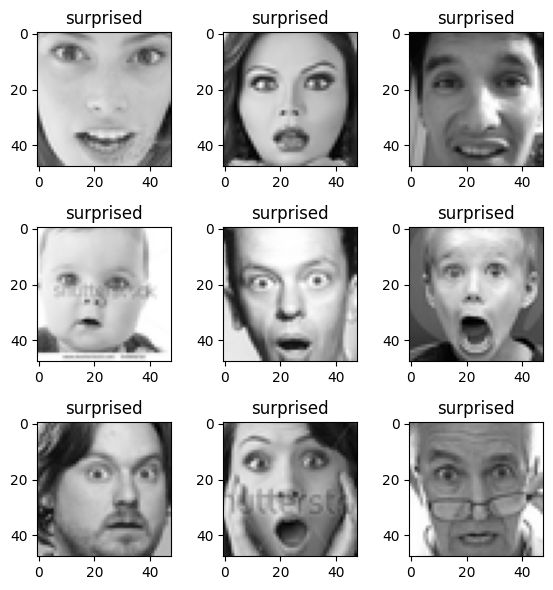

In [6]:
def display_images(emotion):
    plt.figure(figsize=(6,6))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

## Images per emotion

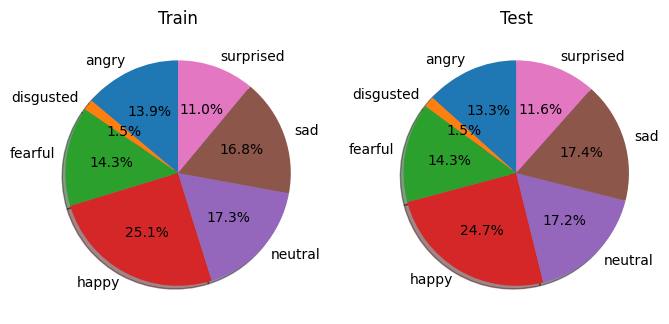

Emotion : angry
	Training : 3995
	 Testing : 958
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : surprised
	Training : 3171
	 Testing : 831


In [7]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in labels ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in labels ])
label = labels
  
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in labels:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

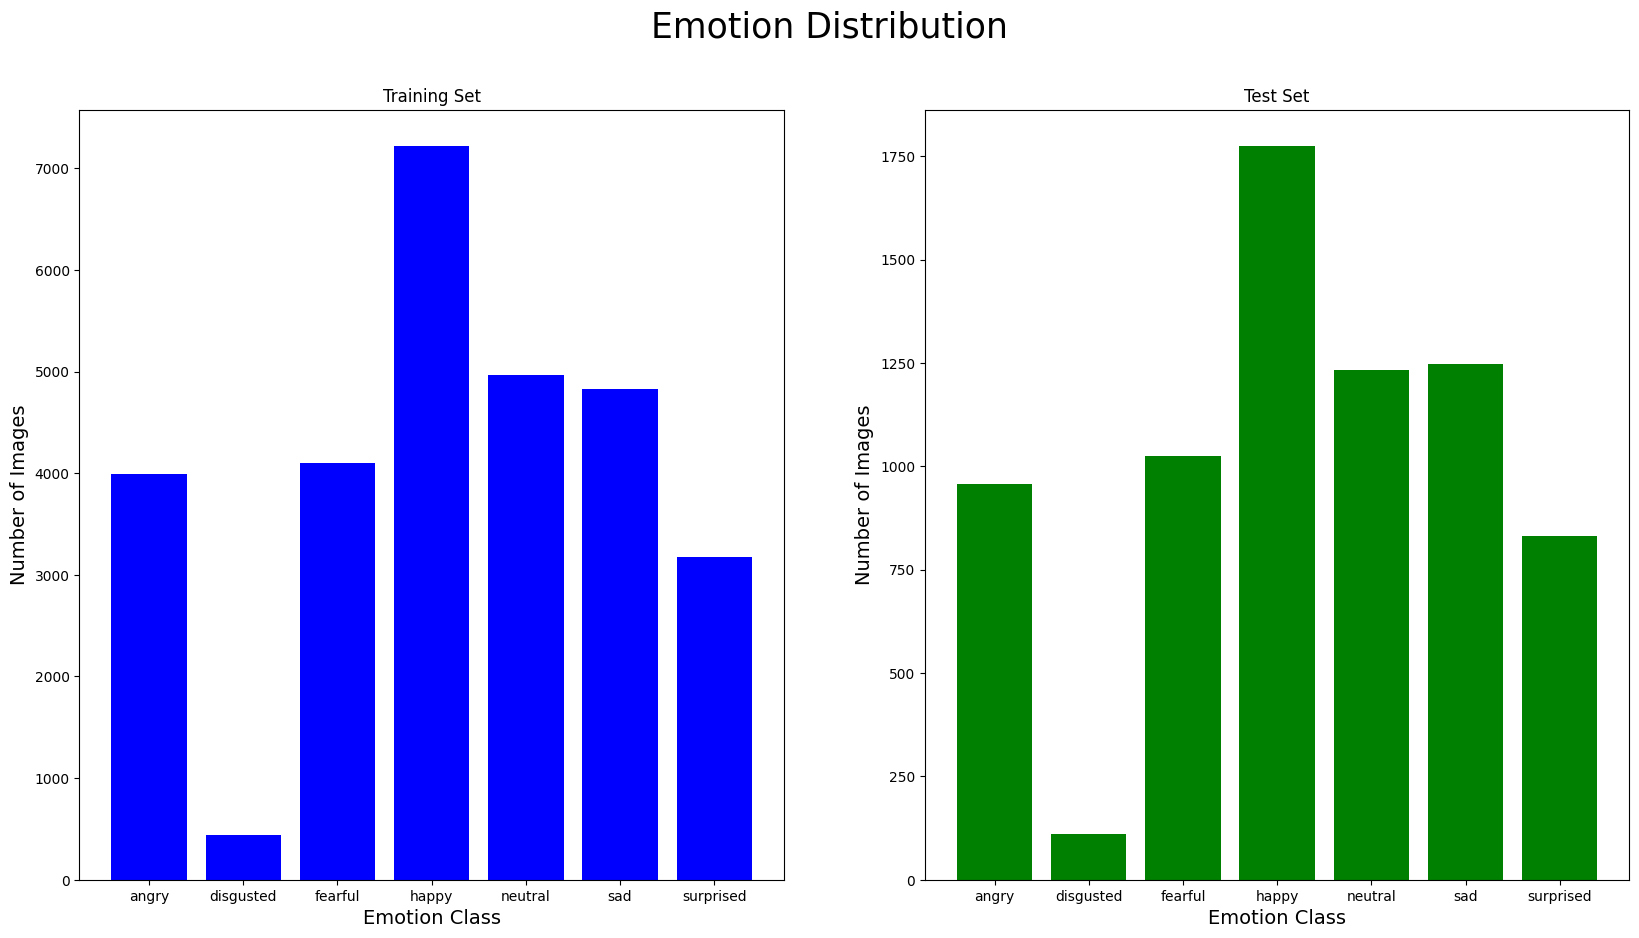

In [8]:
#bar charts
train_dist = np.array([len(os.listdir(train_dir+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_dir+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')
plt.show()

## Data Preprocessing

In [9]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')


valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')  

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
train.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [11]:
test.class_indices

{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [18]:
model = tf.keras.Sequential()

#Input Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25)) #test

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.2))

model.add(Flatten()) #Flattens our data into a vector

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

model.summary()

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,229,447 (35.21 MB)

 Trainable params: 9,228,423 (35.20 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
emotion9 = model.fit(train, validation_data=valid, epochs=60)

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2413 - loss: 1.8473

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 724s 2s/step - accuracy: 0.2414 - loss: 1.8471 - val_accuracy: 0.3146 - val_loss: 1.8317
Epoch 2/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 270s 752ms/step - accuracy: 0.3560 - loss: 1.6504 - val_accuracy: 0.4039 - val_loss: 1.5623
Epoch 3/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 320s 891ms/step - accuracy: 0.4103 - loss: 1.5271 - val_accuracy: 0.4471 - val_loss: 1.4447
Epoch 4/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.4505 - loss: 1.4360 - val_accuracy: 0.4767 - val_loss: 1.3649
Epoch 5/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 358s 999ms/step - accuracy: 0.4800 - loss: 1.3715 - val_accuracy: 0.4898 - val_loss: 1.3599
Epoch 6/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 611s 2s/step - accuracy: 0.4956 - loss: 1.3204 - val_accuracy: 0.5233 - val_loss: 1.2785
Epoch 7/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.5129 - loss: 1.2722 - val_accuracy: 0.5300 - val_loss: 1.2561
Epoch 8/60
359/359 ━━━━━━━━━━━━━━━━━━━━ 306s 852ms/step - accuracy: 0.5218 - loss: 1.2497 - val_acc

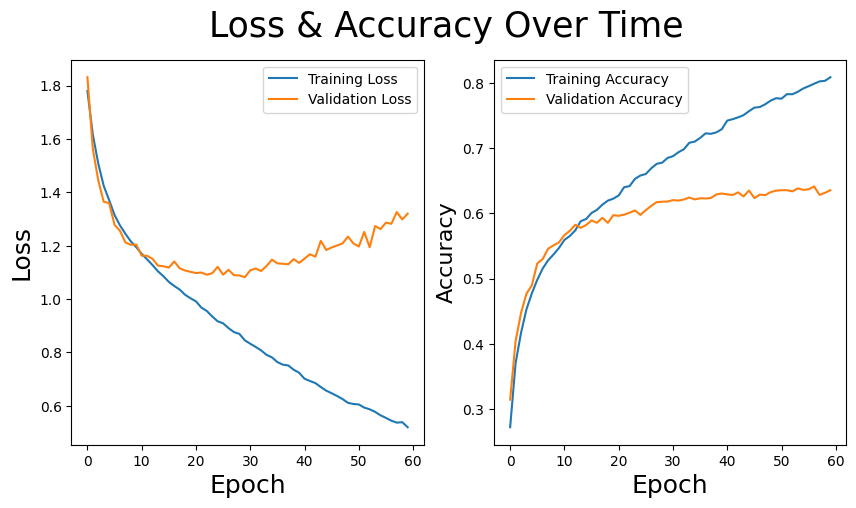

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion9.history['loss'], label='Training Loss')
plt.plot(emotion9.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion9.history['accuracy'], label='Training Accuracy')
plt.plot(emotion9.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

# Model Evaluation

In [17]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

359/359 ━━━━━━━━━━━━━━━━━━━━ 116s 323ms/step - accuracy: 0.8983 - loss: 0.2873
113/113 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.6113 - loss: 1.3999


# Visualization of Results

##### Surprised

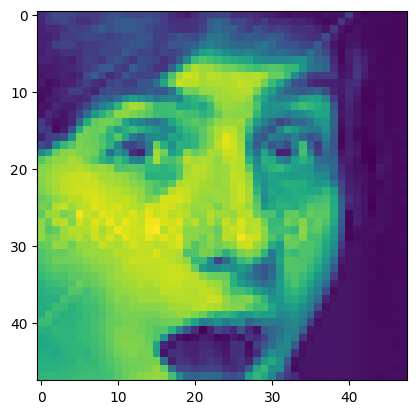

In [18]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/surprised/im33.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [19]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0)]
{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [20]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])

Prediction: surprised


##### Sad

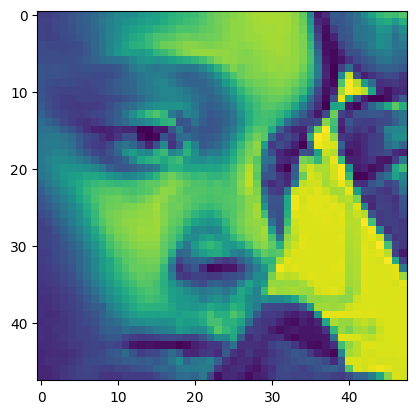

In [21]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/sad/im24.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [ ]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction: sad


##### Happy

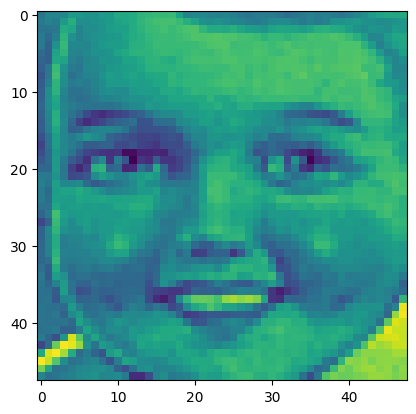

In [23]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/happy/im4.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [24]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: happy


##### Fear

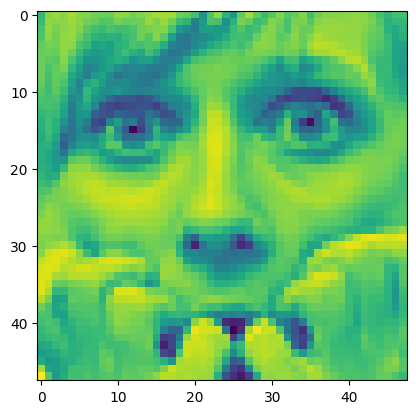

In [25]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/fearful/im2.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [26]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Prediction: fearful


##### Angry

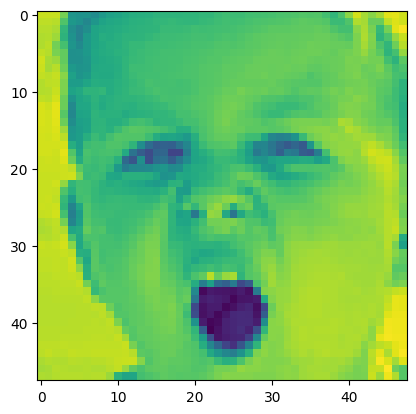

In [27]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/angry/im7.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [28]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Prediction: angry


##### Disgust

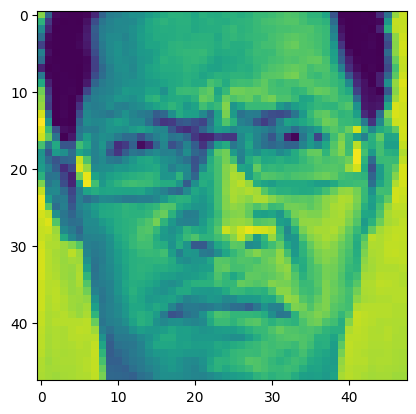

In [29]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/disgusted/im7.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [30]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Prediction: angry


##### Neutral

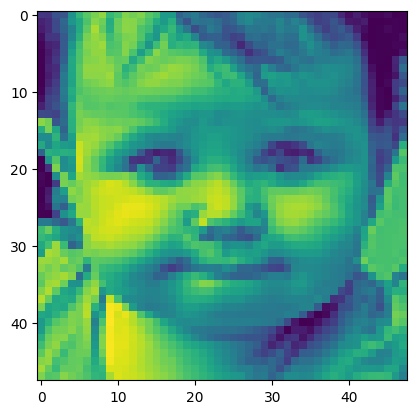

In [31]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/neutral/im21.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [32]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Prediction: happy


In [19]:
print(model.name)

sequential


In [20]:
model.save('sequential_saved_model.h5')

In [21]:
model.save('my_model.keras')

##### Loading the saved model

In [22]:
from tensorflow.keras.models import load_model

# Load the HDF5 model
model_h5 = load_model('sequential_saved_model.h5')


In [38]:
# load tensorflow model
model_keras = load_model('my_model.keras')

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [39]:
# Check model summary
model_h5.summary()
model_keras.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,229,449 (35.21 MB)

 Trainable params: 9,228,423 (35.20 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 2 (12.00 B)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 512)      │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,457,872 (70.41 MB)

 Trainable params: 9,228,423 (35.20 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 9,228,425 (35.20 MB)

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 96s 853ms/step


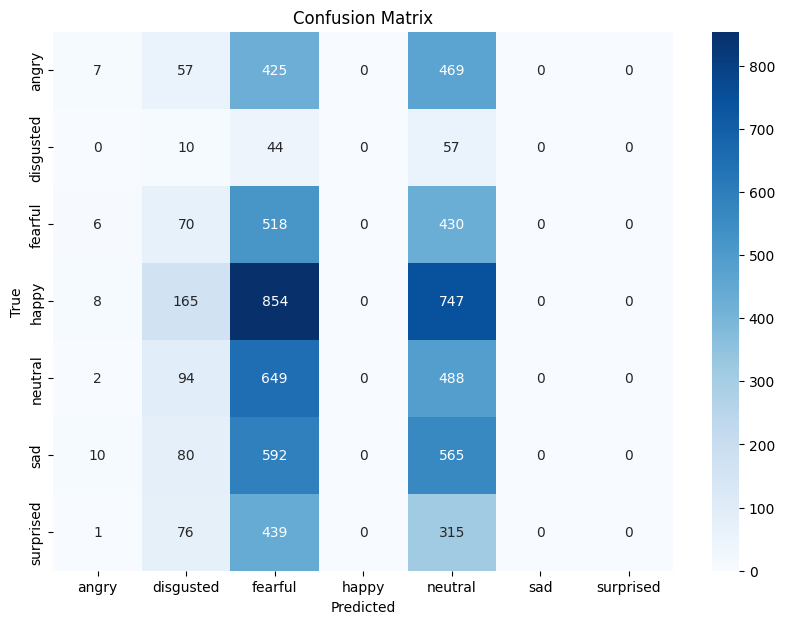

In [23]:


# Generate predictions
y_pred = model.predict(test, batch_size=64)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels for the test set
y_true = test.classes

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [28]:

# Get predictions for the test set
predictions = model.predict(test, batch_size=64, verbose=1)

# Convert predictions to class labels (since the model output is probabilistic)
predicted_classes = np.argmax(predictions, axis=1) 

# True labels from the test set
true_classes = test.classes

print(classification_report(true_classes, predicted_classes, target_names=test.class_indices.keys()))

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step
              precision    recall  f1-score   support

       angry       0.21      0.01      0.01       958
   disgusted       0.02      0.09      0.03       111
     fearful       0.15      0.51      0.23      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.16      0.40      0.23      1233
         sad       0.00      0.00      0.00      1247
   surprised       0.00      0.00      0.00       831

    accuracy                           0.14      7178
   macro avg       0.08      0.14      0.07      7178
weighted avg       0.08      0.14      0.07      7178



c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srish\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Performance Report:
               precision    recall  f1-score   support

       angry       0.21      0.01      0.01       958
   disgusted       0.02      0.09      0.03       111
     fearful       0.15      0.51      0.23      1024
       happy       0.00      0.00      0.00      1774
     neutral       0.16      0.40      0.23      1233
         sad       0.00      0.00      0.00      1247
   surprised       0.00      0.00      0.00       831

    accuracy                           0.14      7178
   macro avg       0.08      0.14      0.07      7178
weighted avg       0.08      0.14      0.07      7178



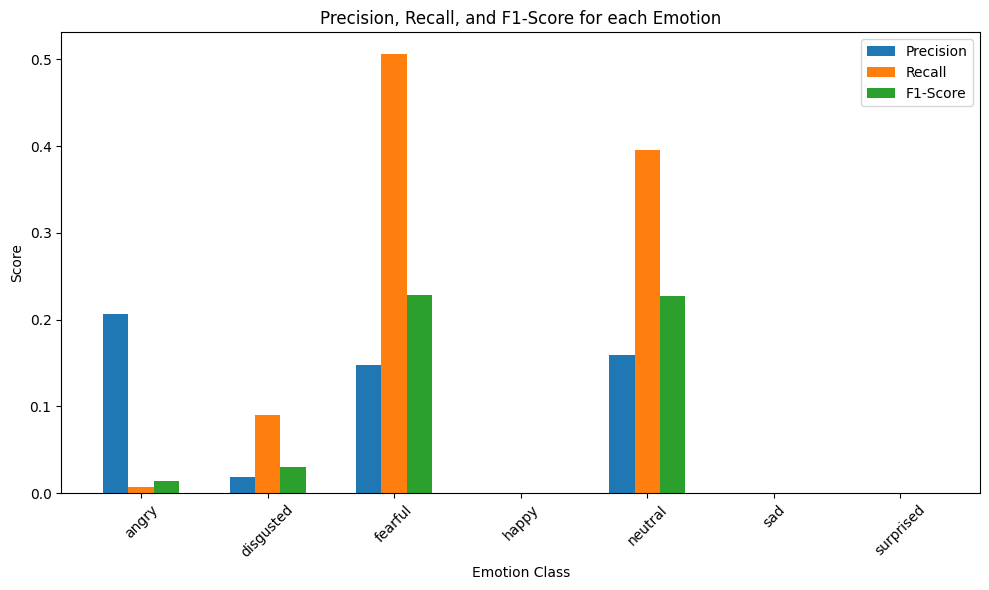

In [29]:
# Print overall performance metrics (accuracy, precision, recall, F1-score)
performance_metrics = classification_report(true_classes, predicted_classes, target_names=test.class_indices.keys())
print("Performance Report:\n", performance_metrics)

# Optionally, plot the Precision, Recall, and F1-score for each class
metrics = classification_report(true_classes, predicted_classes, target_names=test.class_indices.keys(), output_dict=True)
precision = [metrics[label]['precision'] for label in test.class_indices.keys()]
recall = [metrics[label]['recall'] for label in test.class_indices.keys()]
f1_score = [metrics[label]['f1-score'] for label in test.class_indices.keys()]

# Plotting Precision, Recall, and F1-score
labels = list(test.class_indices.keys())
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - 0.2, precision, 0.2, label='Precision')
ax.bar(x, recall, 0.2, label='Recall')
ax.bar(x + 0.2, f1_score, 0.2, label='F1-Score')

ax.set_xlabel('Emotion Class')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for each Emotion')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()


##### Quick prediction

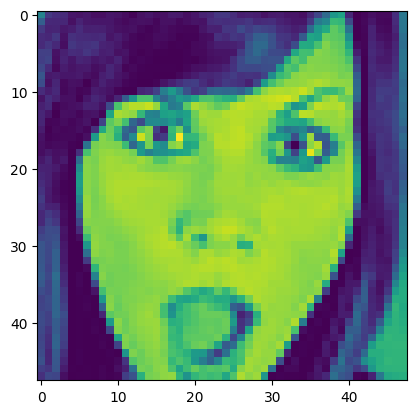

In [61]:
img = image.load_img('D:/Real_Time_Sentiment_Analysis/data/test/surprised/im10.png', 
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

In [62]:
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model_h5.predict(img) #using model to predict emotion of image
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: surprised
